## Задача 3. Многоклассовая классификация и множественная классификация/регрессия

Ершов Александр Сергеевич, гр. 22.М04-мм

Задача:

\+ Изучите возможности sklearn для решения задач Multiclass classification, Multilabel classification и Multioutput Regression. Основные компоненты библиотеки указаны на рисунке ниже.

\+ Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

\+ Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

\+ При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

\+ Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

\+ Замерить время обучения каждой модели для каждой стратегии. Для оценки качества моделей используйте метрику AUC-ROC.

\+ Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

\- * (+3 балла) Повторить все пункты для задачи Multilabel classification (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать MultiOutputClassifier и ClassifierChain.

\+ * (+2 балла) Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2.


## Multicalss classification


### Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задач

Датасет "Palmer Archipelago (Antarctica) penguin data" (https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)


In [1]:
import pandas as pd
penguins_data = pd.read_csv("penguins_size.csv")
penguins_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Описание датасета:
- species - вид пингвина
- island - название острова в архипелаге
- culmen_length_mm - длина клюва (culmen) в мм
- culmen_depth_mm - глубина клюва (culmen) в мм
- flipper_length_mm - длина ласта в мм
- body_mass_g - масса тела в гр
- sex - пол пингвина



### EDA

In [2]:
penguins_data.shape

(344, 7)

In [3]:
penguins_data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

В данных есть пропуски в признаках culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex.

Удалим строки с пропусками в 4 признаках.

In [4]:
penguins_data.drop(penguins_data[penguins_data['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [5]:
penguins_data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

Остались только пропуски в признаке `Sex`. Заполним их значением `MALE`.

In [6]:
penguins_data['sex'] = penguins_data['sex'].fillna('MALE')

In [7]:
penguins_data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Пропусков не осталось.

Посмотрим на какие есть уникальные занчения категориальных признаков.

In [8]:
penguins_data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
penguins_data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Данные по трем островам и трем видам.

In [10]:
penguins_data['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Кроме `nan` в признаке `sex` есть пропуски в данных в виде `.`.

In [11]:
penguins_data[penguins_data['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Пропуск в виде `.` один. Удалим данную строку.

In [12]:
penguins_data.drop(penguins_data[penguins_data['sex']=='.'].index, inplace=True)

Распределение по признаку `Species` неравномерное.

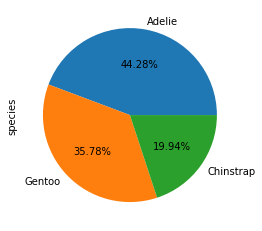

In [13]:
species = penguins_data.species.value_counts()
species.plot(kind='pie', autopct="%.2f%%")

Распределение по признаку `Island` также неравномерное и схоже с таковым по признаку `Species`.

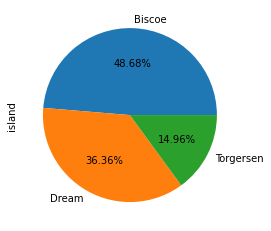

In [14]:
island = penguins_data.island.value_counts()
island.plot(kind='pie', autopct="%.2f%%")

По признаку `Sex` данных почти одинаковое количество.

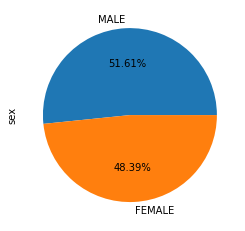

In [15]:
sex = penguins_data.sex.value_counts()
sex.plot(kind='pie',autopct="%.2f%%")

Длина ласт и вид пингвина.

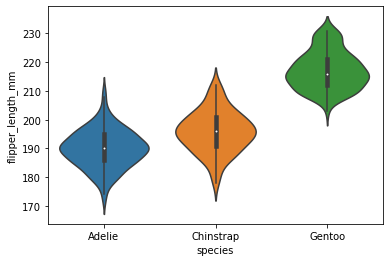

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x = "species", y = "flipper_length_mm", data = penguins_data)

У большинства пингвинов вида `Gentoo` ласты длиннее, чем у других видов.

Длина ласт по виду и полу пингвина.


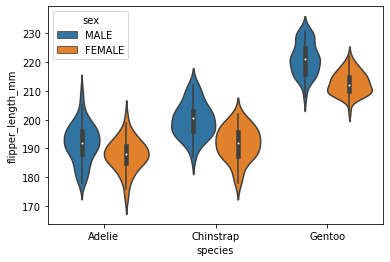

In [17]:
sns.violinplot(x = "species", y = "flipper_length_mm", data = penguins_data, hue = "sex")

У мужских особей всех видов ласты в большинстве длиннее, чем у женских. У мужских особей вида `Gentoo` одни из самых длинных ласт.

Корреляция признаков.


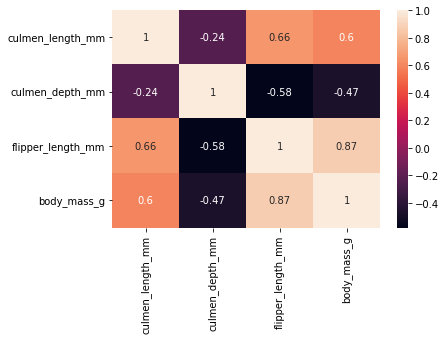

In [18]:
sns.heatmap(penguins_data.corr(), annot = True)

У признаков `body_mass_g` и `flipper_length_mm` высокая корреляция 0.87, можно попробовать убрать один из них. 

### При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Трансформируем категориальные признаки `species`, `islands`, `sex`.

In [19]:
penguins_data['species'] = penguins_data['species'].map({'Adelie' : 0, 'Chinstrap' : 1, 'Gentoo' : 2})
penguins_data['island'] = penguins_data['island'].map({'Torgersen' : 0, 'Biscoe' : 1, 'Dream' : 2})
penguins_data['sex'] = penguins_data['sex'].map({'MALE' : 0, 'FEMALE' : 1})

In [20]:
penguins_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0


### Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

Целевой переменной будет `species`.

In [21]:
penguins_data_X = penguins_data.drop(columns=['species'])
penguins_data_y = penguins_data['species']

from sklearn.model_selection import train_test_split

penguins_train_X, penguins_test_X, penguins_train_y, penguins_test_y = train_test_split(penguins_data_X, penguins_data_y, test_size = 0.3, random_state=19)

#### Linear regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
import time
import numpy as np

lr_hp = { 'C' : np.logspace(-2, 4, 7),
               'solver' : ["liblinear", "newton-cg","sag"],
               'max_iter' : [5000]
}

Grid_LR_penguins = GridSearchCV(LogisticRegression(),
                      lr_hp,
                      scoring='roc_auc',
                      cv = 3)

- OneVsOne

In [ ]:
LR_penguins_ovo = OneVsOneClassifier(Grid_LR_penguins)
start_LR_penguins_ovo = time.time()
LR_penguins_ovo.fit(penguins_train_X, penguins_train_y)
training_time_LR_penguins_ovo = time.time() - start_LR_penguins_ovo

In [25]:
LR_penguins_train_predict = LR_penguins_ovo.predict(penguins_train_X)
accuracy_lr_train_ovo = accuracy_score(penguins_train_y, LR_penguins_train_predict)
print("OneVsOne\n train accuracy: ", accuracy_lr_train_ovo, "\n training time: ", training_time_LR_penguins_ovo)

OneVsOne
 train accuracy:  1.0 
 training time:  22.15861964225769


In [26]:
LR_penguins_test_predict = LR_penguins_ovo.predict(penguins_test_X)
accuracy_lr_test_ovo = accuracy_score(penguins_test_y, LR_penguins_test_predict)
print("OneVsOne\n test accuracy: ", accuracy_lr_test_ovo)

OneVsOne
 test accuracy:  1.0


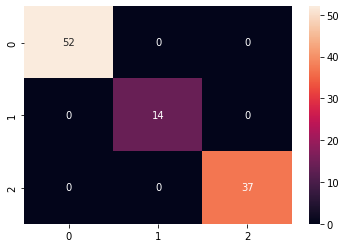

In [27]:
sns.heatmap(confusion_matrix(penguins_test_y, LR_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OneVsRest

In [ ]:
LR_penguins_ovr = OneVsRestClassifier(Grid_LR_penguins)
start_LR_penguins_ovr = time.time()
LR_penguins_ovr.fit(penguins_train_X, penguins_train_y)
training_time_LR_penguins_ovr = time.time() - start_LR_penguins_ovr

In [29]:
LR_penguins_train_predict = LR_penguins_ovr.predict(penguins_train_X)
accuracy_lr_train_ovr = accuracy_score(penguins_train_y, LR_penguins_train_predict)
print("OneVsRest\n train accuracy: ", accuracy_lr_train_ovr, "\n training time: ", training_time_LR_penguins_ovr)

OneVsRest
 train accuracy:  1.0 
 training time:  16.024529933929443


In [30]:
LR_penguins_test_predict = LR_penguins_ovr.predict(penguins_test_X)
accuracy_lr_test_ovr = accuracy_score(penguins_test_y, LR_penguins_test_predict)
print("OneVsRest\n test accuracy: ", accuracy_lr_test_ovr)

OneVsRest
 test accuracy:  0.9902912621359223


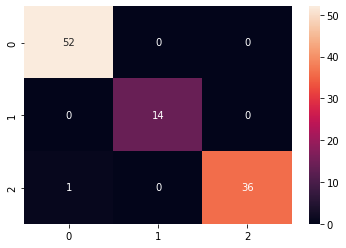

In [31]:
sns.heatmap(confusion_matrix(penguins_test_y, LR_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OutputCode

In [ ]:
LR_penguins_oc = OutputCodeClassifier(Grid_LR_penguins)
start_LR_penguins_oc = time.time()
LR_penguins_oc.fit(penguins_train_X, penguins_train_y)
training_time_LR_penguins_oc = time.time() - start_LR_penguins_oc

In [33]:
LR_penguins_train_predict = LR_penguins_oc.predict(penguins_train_X)
accuracy_lr_train_oc = accuracy_score(penguins_train_y, LR_penguins_train_predict)
print("OutputCode\n train accuracy: ", accuracy_lr_train_oc, "\n training time: ", training_time_LR_penguins_oc)

OutputCode
 train accuracy:  1.0 
 training time:  16.273345947265625


In [34]:
LR_penguins_test_predict = LR_penguins_oc.predict(penguins_test_X)
accuracy_lr_test_oc = accuracy_score(penguins_test_y, LR_penguins_test_predict)
print("OutputCode\n test accuracy: ", accuracy_lr_test_oc)

OutputCode
 test accuracy:  0.9902912621359223


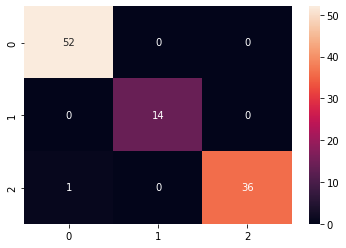

In [35]:
sns.heatmap(confusion_matrix(penguins_test_y, LR_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

#### SVM

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.metrics import accuracy_score

In [37]:
import time
import numpy as np

SVM_hp = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

Grid_SVM_penguins = GridSearchCV(SVC(),
                      SVM_hp,
                      scoring='roc_auc',
                      cv = 3)

- OneVsOne

In [38]:
SVM_penguins_ovo = OneVsOneClassifier(Grid_SVM_penguins)
start_SVM_penguins_ovo = time.time()
SVM_penguins_ovo.fit(penguins_train_X, penguins_train_y)
training_time_SVM_penguins_ovo = time.time() - start_SVM_penguins_ovo

In [39]:
SVM_penguins_train_predict = SVM_penguins_ovo.predict(penguins_train_X)
accuracy_svm_train_ovo = accuracy_score(penguins_train_y, SVM_penguins_train_predict)
print("OneVsOne\n train accuracy: ", accuracy_svm_train_ovo, "\n training time: ", training_time_SVM_penguins_ovo)

OneVsOne
 train accuracy:  0.9957983193277311 
 training time:  0.8828577995300293


In [40]:
SVM_penguins_test_predict = SVM_penguins_ovo.predict(penguins_test_X)
accuracy_svm_test_ovo = accuracy_score(penguins_test_y, SVM_penguins_test_predict)
print("OneVsOne\n test accuracy: ", accuracy_svm_test_ovo)

OneVsOne
 test accuracy:  0.9223300970873787


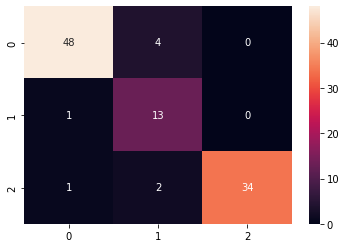

In [41]:
sns.heatmap(confusion_matrix(penguins_test_y, SVM_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OneVsRest

In [42]:
SVM_penguins_ovr = OneVsRestClassifier(Grid_SVM_penguins)
start_SVM_penguins_ovr = time.time()
SVM_penguins_ovr.fit(penguins_train_X, penguins_train_y)
training_time_SVM_penguins_ovr = time.time() - start_SVM_penguins_ovr

In [43]:
SVM_penguins_train_predict = SVM_penguins_ovr.predict(penguins_train_X)
accuracy_svm_train_ovr = accuracy_score(penguins_train_y, SVM_penguins_train_predict)
print("OneVsRest\n train accuracy: ", accuracy_svm_train_ovr, "\n training time: ", training_time_SVM_penguins_ovr)

OneVsRest
 train accuracy:  0.9957983193277311 
 training time:  1.9180586338043213


In [44]:
SVM_penguins_test_predict = SVM_penguins_ovr.predict(penguins_test_X)
accuracy_svm_test_ovr = accuracy_score(penguins_test_y, SVM_penguins_test_predict)
print("OneVsRest\n test accuracy: ", accuracy_svm_test_ovr)

OneVsRest
 test accuracy:  0.9320388349514563


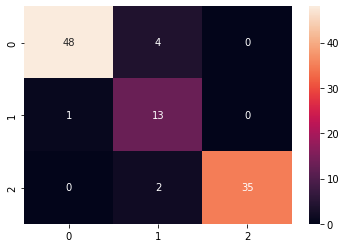

In [45]:
sns.heatmap(confusion_matrix(penguins_test_y, SVM_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OutputCode

In [46]:
SVM_penguins_oc = OutputCodeClassifier(Grid_SVM_penguins)
start_SVM_penguins_oc = time.time()
SVM_penguins_oc.fit(penguins_train_X, penguins_train_y)
training_time_SVM_penguins_oc = time.time() - start_SVM_penguins_oc

In [47]:
SVM_penguins_train_predict = SVM_penguins_oc.predict(penguins_train_X)
accuracy_svm_train_oc = accuracy_score(penguins_train_y, SVM_penguins_train_predict)
print("OutputCode\n train accuracy: ", accuracy_svm_train_oc, "\n training time: ", training_time_SVM_penguins_oc)

OutputCode
 train accuracy:  0.9957983193277311 
 training time:  1.9010882377624512


In [48]:
SVM_penguins_test_predict = SVM_penguins_oc.predict(penguins_test_X)
accuracy_svm_test_oc = accuracy_score(penguins_test_y, SVM_penguins_test_predict)
print("OutputCode\n test accuracy: ", accuracy_svm_test_oc)

OutputCode
 test accuracy:  0.9320388349514563


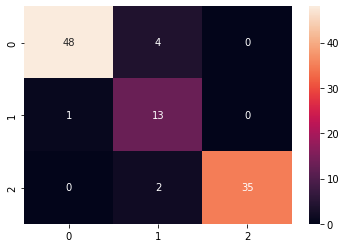

In [49]:
sns.heatmap(confusion_matrix(penguins_test_y, SVM_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

#### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.metrics import accuracy_score

In [51]:
import time
import numpy as np

KNN_hp = {'n_neighbors': list(range(1, 31))} 

Grid_KNN_penguins = GridSearchCV(KNeighborsClassifier(),
                      KNN_hp,
                      scoring='roc_auc',
                      cv = 3)

- OneVsOne

In [52]:
KNN_penguins_ovo = OneVsOneClassifier(Grid_KNN_penguins)
start_KNN_penguins_ovo = time.time()
KNN_penguins_ovo.fit(penguins_train_X, penguins_train_y)
training_time_KNN_penguins_ovo = time.time() - start_KNN_penguins_ovo

In [53]:
KNN_penguins_train_predict = KNN_penguins_ovo.predict(penguins_train_X)
accuracy_knn_train_ovo = accuracy_score(penguins_train_y, KNN_penguins_train_predict)
print("OneVsOne\n train accuracy: ", accuracy_knn_train_ovo, "\n training time: ", training_time_KNN_penguins_ovo)

OneVsOne
 train accuracy:  0.8949579831932774 
 training time:  0.9051504135131836


In [54]:
KNN_penguins_test_predict = KNN_penguins_ovo.predict(penguins_test_X)
accuracy_knn_test_ovo = accuracy_score(penguins_test_y, KNN_penguins_test_predict)
print("OneVsOne\n test accuracy: ", accuracy_knn_test_ovo)

OneVsOne
 test accuracy:  0.8737864077669902


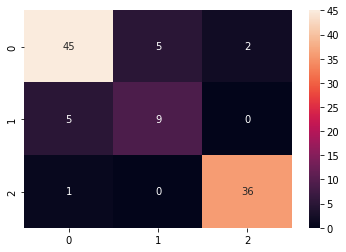

In [55]:
sns.heatmap(confusion_matrix(penguins_test_y, KNN_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OneVsRest

In [56]:
KNN_penguins_ovr = OneVsRestClassifier(Grid_KNN_penguins)
start_KNN_penguins_ovr = time.time()
KNN_penguins_ovr.fit(penguins_train_X, penguins_train_y)
training_time_KNN_penguins_ovr = time.time() - start_KNN_penguins_ovr

In [57]:
KNN_penguins_train_predict = KNN_penguins_ovr.predict(penguins_train_X)
accuracy_knn_train_ovr = accuracy_score(penguins_train_y, KNN_penguins_train_predict)
print("OneVsRest\n train accuracy: ", accuracy_knn_train_ovr, "\n training time: ", training_time_KNN_penguins_ovr)

OneVsRest
 train accuracy:  0.8109243697478992 
 training time:  1.8416993618011475


In [58]:
KNN_penguins_test_predict = KNN_penguins_ovr.predict(penguins_test_X)
accuracy_knn_test_ovr = accuracy_score(penguins_test_y, KNN_penguins_test_predict)
print("OneVsRest\n test accuracy: ", accuracy_knn_test_ovr)

OneVsRest
 test accuracy:  0.7864077669902912


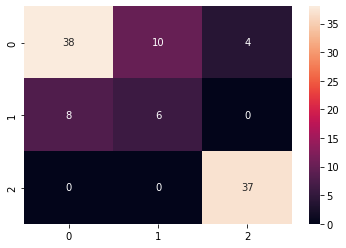

In [59]:
sns.heatmap(confusion_matrix(penguins_test_y, KNN_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OutputCode

In [60]:
KNN_penguins_oc = OutputCodeClassifier(Grid_KNN_penguins)
start_KNN_penguins_oc = time.time()
KNN_penguins_oc.fit(penguins_train_X, penguins_train_y)
training_time_KNN_penguins_oc = time.time() - start_KNN_penguins_oc

In [61]:
KNN_penguins_train_predict = KNN_penguins_oc.predict(penguins_train_X)
accuracy_knn_train_oc = accuracy_score(penguins_train_y, KNN_penguins_train_predict)
print("OutputCode\n train accuracy: ", accuracy_knn_train_oc, "\n training time: ", training_time_KNN_penguins_oc)

OutputCode
 train accuracy:  0.8151260504201681 
 training time:  2.4950013160705566


In [62]:
KNN_penguins_test_predict = KNN_penguins_oc.predict(penguins_test_X)
accuracy_knn_test_oc = accuracy_score(penguins_test_y, KNN_penguins_test_predict)
print("OutputCode\n test accuracy: ", accuracy_knn_test_oc)

OutputCode
 test accuracy:  0.7864077669902912


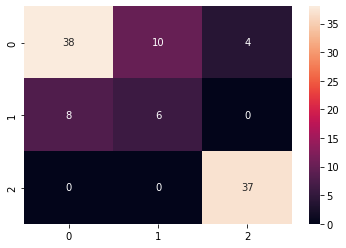

In [63]:
sns.heatmap(confusion_matrix(penguins_test_y, KNN_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

#### Naive bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.metrics import accuracy_score

In [65]:
import time
import numpy as np

NB_hp = {'var_smoothing': np.logspace(0, -9, num = 100)}

Grid_NB_penguins = GridSearchCV(GaussianNB(),
                      NB_hp,
                      scoring='roc_auc',
                      cv = 3)

- OneVsOne

In [66]:
NB_penguins_ovo = OneVsOneClassifier(Grid_NB_penguins)
start_NB_penguins_ovo = time.time()
NB_penguins_ovo.fit(penguins_train_X, penguins_train_y)
training_time_NB_penguins_ovo = time.time() - start_NB_penguins_ovo

In [67]:
NB_penguins_train_predict = NB_penguins_ovo.predict(penguins_train_X)
accuracy_nb_train_ovo = accuracy_score(penguins_train_y, NB_penguins_train_predict)
print("OneVsOne\n train accuracy: ", accuracy_nb_train_ovo, "\n training time: ", training_time_NB_penguins_ovo)

OneVsOne
 train accuracy:  0.9621848739495799 
 training time:  2.427072048187256


In [68]:
NB_penguins_test_predict = NB_penguins_ovo.predict(penguins_test_X)
accuracy_nb_test_ovo = accuracy_score(penguins_test_y, NB_penguins_test_predict)
print("OneVsOne\n test accuracy: ", accuracy_nb_test_ovo)

OneVsOne
 test accuracy:  0.970873786407767


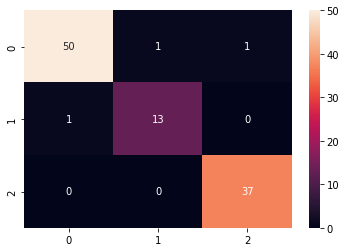

In [69]:
sns.heatmap(confusion_matrix(penguins_test_y, NB_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OneVsRest

In [70]:
NB_penguins_ovr = OneVsRestClassifier(Grid_NB_penguins)
start_NB_penguins_ovr = time.time()
NB_penguins_ovr.fit(penguins_train_X, penguins_train_y)
training_time_NB_penguins_ovr = time.time() - start_NB_penguins_ovr

In [71]:
NB_penguins_train_predict = NB_penguins_ovr.predict(penguins_train_X)
accuracy_nb_train_ovr = accuracy_score(penguins_train_y, NB_penguins_train_predict)
print("OneVsRest\n train accuracy: ", accuracy_nb_train_ovr, "\n training time: ", training_time_NB_penguins_ovr)

OneVsRest
 train accuracy:  0.9705882352941176 
 training time:  5.554149150848389


In [72]:
NB_penguins_test_predict = NB_penguins_ovr.predict(penguins_test_X)
accuracy_nb_test_ovr = accuracy_score(penguins_test_y, NB_penguins_test_predict)
print("OneVsRest\n test accuracy: ", accuracy_nb_test_ovr)

OneVsRest
 test accuracy:  0.970873786407767


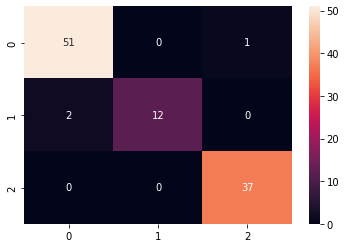

In [73]:
sns.heatmap(confusion_matrix(penguins_test_y, NB_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OutputCode

In [74]:
NB_penguins_oc = OutputCodeClassifier(Grid_NB_penguins)
start_NB_penguins_oc = time.time()
NB_penguins_oc.fit(penguins_train_X, penguins_train_y)
training_time_NB_penguins_oc = time.time() - start_NB_penguins_oc

In [75]:
NB_penguins_train_predict = NB_penguins_oc.predict(penguins_train_X)
accuracy_nb_train_oc = accuracy_score(penguins_train_y, NB_penguins_train_predict)
print("OutputCode\n train accuracy: ", accuracy_nb_train_oc, "\n training time: ", training_time_NB_penguins_oc)

OutputCode
 train accuracy:  0.6134453781512605 
 training time:  1.862637996673584


In [76]:
NB_penguins_test_predict = NB_penguins_oc.predict(penguins_test_X)
accuracy_nb_test_oc = accuracy_score(penguins_test_y, NB_penguins_test_predict)
print("OutputCode\n test accuracy: ", accuracy_nb_test_oc)

OutputCode
 test accuracy:  0.6213592233009708


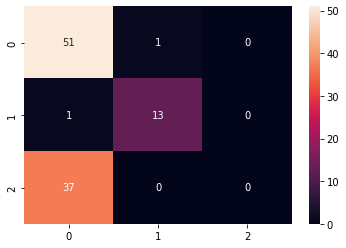

In [77]:
sns.heatmap(confusion_matrix(penguins_test_y, NB_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

#### Decision tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.metrics import accuracy_score

In [79]:
import time
import numpy as np

DT_hp = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

Grid_DT_penguins = GridSearchCV(DecisionTreeClassifier(),
                      DT_hp,
                      scoring='roc_auc',
                      cv = 3)

- OneVsOne

In [80]:
DT_penguins_ovo = OneVsOneClassifier(Grid_DT_penguins)
start_DT_penguins_ovo = time.time()
DT_penguins_ovo.fit(penguins_train_X, penguins_train_y)
training_time_DT_penguins_ovo = time.time() - start_DT_penguins_ovo

In [81]:
DT_penguins_train_predict = DT_penguins_ovo.predict(penguins_train_X)
accuracy_dt_train_ovo = accuracy_score(penguins_train_y, DT_penguins_train_predict)
print("OneVsOne\n train accuracy: ", accuracy_dt_train_ovo, "\n training time: ", training_time_DT_penguins_ovo)

OneVsOne
 train accuracy:  0.9789915966386554 
 training time:  1.0435316562652588


In [82]:
DT_penguins_test_predict = DT_penguins_ovo.predict(penguins_test_X)
accuracy_dt_test_ovo = accuracy_score(penguins_test_y, DT_penguins_test_predict)
print("OneVsOne\n test accuracy: ", accuracy_dt_test_ovo)

OneVsOne
 test accuracy:  0.970873786407767


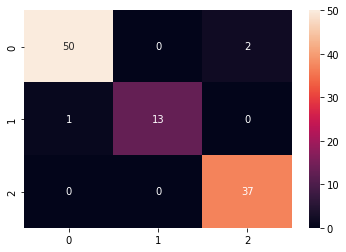

In [83]:
sns.heatmap(confusion_matrix(penguins_test_y, DT_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OneVsRest

In [84]:
DT_penguins_ovr = OneVsRestClassifier(Grid_DT_penguins)
start_DT_penguins_ovr = time.time()
DT_penguins_ovr.fit(penguins_train_X, penguins_train_y)
training_time_DT_penguins_ovr = time.time() - start_DT_penguins_ovr

In [85]:
DT_penguins_train_predict = DT_penguins_ovr.predict(penguins_train_X)
accuracy_dt_train_ovr = accuracy_score(penguins_train_y, DT_penguins_train_predict)
print("OneVsRest\n train accuracy: ", accuracy_dt_train_ovr, "\n training time: ", training_time_DT_penguins_ovr)

OneVsRest
 train accuracy:  0.9915966386554622 
 training time:  2.586763620376587


In [86]:
DT_penguins_test_predict = DT_penguins_ovr.predict(penguins_test_X)
accuracy_dt_test_ovr = accuracy_score(penguins_test_y, DT_penguins_test_predict)
print("OneVsRest\n test accuracy: ", accuracy_dt_test_ovr)

OneVsRest
 test accuracy:  0.9902912621359223


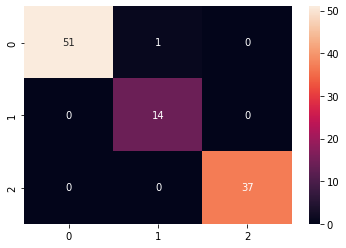

In [87]:
sns.heatmap(confusion_matrix(penguins_test_y, DT_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

- OutputCode

In [88]:
DT_penguins_oc = OutputCodeClassifier(Grid_DT_penguins)
start_DT_penguins_oc = time.time()
DT_penguins_oc.fit(penguins_train_X, penguins_train_y)
training_time_DT_penguins_oc = time.time() - start_DT_penguins_oc

In [89]:
DT_penguins_train_predict = DT_penguins_oc.predict(penguins_train_X)
accuracy_dt_train_oc = accuracy_score(penguins_train_y, DT_penguins_train_predict)
print("OutputCode\n train accuracy: ", accuracy_dt_train_oc, "\n training time: ", training_time_DT_penguins_oc)

OutputCode
 train accuracy:  0.634453781512605 
 training time:  1.76297926902771


In [90]:
DT_penguins_test_predict = DT_penguins_oc.predict(penguins_test_X)
accuracy_dt_test_oc = accuracy_score(penguins_test_y, DT_penguins_test_predict)
print("OutputCode\n test accuracy: ", accuracy_dt_test_oc)

OutputCode
 test accuracy:  0.6407766990291263


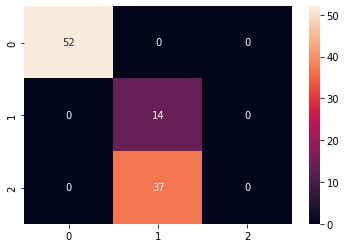

In [91]:
sns.heatmap(confusion_matrix(penguins_test_y, DT_penguins_test_predict), annot = True, fmt = '.0f')
plt.show()

### Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

In [92]:
stats = [('Logistic Regression', accuracy_lr_train_ovo, accuracy_lr_train_ovr,  accuracy_lr_train_oc,
                                   accuracy_lr_test_ovo, accuracy_lr_test_ovr, accuracy_lr_test_oc,
                                   training_time_LR_penguins_ovo, training_time_LR_penguins_ovr, training_time_LR_penguins_oc),
          ('KNN', accuracy_knn_train_ovo, accuracy_knn_train_ovr, accuracy_knn_train_oc, 
                accuracy_knn_test_ovo, accuracy_knn_test_ovr, accuracy_knn_test_oc, 
               training_time_KNN_penguins_ovo, training_time_KNN_penguins_ovr, training_time_KNN_penguins_oc),
          ('SVM', accuracy_svm_train_ovo, accuracy_svm_train_ovr, accuracy_svm_train_oc, 
                       accuracy_svm_test_ovo, accuracy_svm_test_ovr, accuracy_svm_test_oc, 
                       training_time_SVM_penguins_ovo, training_time_SVM_penguins_ovr, training_time_SVM_penguins_oc),
          ('Naive Bayes', accuracy_nb_train_ovo, accuracy_nb_train_ovr, accuracy_nb_train_oc, 
                        accuracy_nb_test_ovo, accuracy_nb_test_ovr, accuracy_nb_test_oc,
                        training_time_NB_penguins_ovo, training_time_NB_penguins_ovr, training_time_NB_penguins_oc),
          ('Decision Tree', accuracy_dt_train_ovo, accuracy_dt_train_ovr, accuracy_dt_train_oc,
                        accuracy_dt_test_ovo, accuracy_dt_test_ovr, accuracy_dt_test_oc,
                        training_time_DT_penguins_ovo, training_time_DT_penguins_ovr, training_time_DT_penguins_oc)
         ]

stats_pd = pd.DataFrame(data = stats, columns=['Model', 'Train accuracy OVO', 'Train accuracy OVR', 'Train accuracy OC', 
                                               'Test accuracy OVO', 'Test accuracy OVR', 'Test accuracy OC',  
                                               'Train time OVO', 'Train time OVR','Train time OC'])

In [93]:
stats_pd = stats_pd.round(decimals = 2)

In [94]:
stats_pd

,Model,Train accuracy OVO,Train accuracy OVR,Train accuracy OC,Test accuracy OVO,Test accuracy OVR,Test accuracy OC,Train time OVO,Train time OVR,Train time OC
0,Logistic Regression,1.00,1.00,1.00,1.00,0.99,0.99,22.16,16.02,16.27
1,KNN,0.89,0.81,0.82,0.87,0.79,0.79,0.91,1.84,2.50
2,SVM,1.00,1.00,1.00,0.92,0.93,0.93,0.88,1.92,1.90
3,Naive Bayes,0.96,0.97,0.61,0.97,0.97,0.62,2.43,5.55,1.86
4,Decision Tree,0.98,0.99,0.63,0.97,0.99,0.64,1.04,2.59,1.76


- Наибольшую точность показал Logistic Regression со стратегией OneVsOne. При этом время обучения данного варианта наибольшее из всех.
- На втором месте Decision Tree со стратегией OneVsRest. Точность уменьшилась на 0.01, однако время обучения заметно меньше.
- Быстрее всех обучались стратегии с KNN и SVM. SVM со стратегией OneVsOne  показал точность 0.92 при одном из самых маленьких времен обучения.


## Multioutput Regression


### \* (+2 балла) Повторить все пункты для задачи Multioutput Regression (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: Ridge. В качестве стратегий попробовать MultiOutputRegressor и RegressorChain. В качестве метрики использовать R2.

Целевыми будут признаки `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`.

In [95]:
penguins_data_X = penguins_data.drop(columns=['culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
penguins_data_y = penguins_data[['culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

from sklearn.model_selection import train_test_split

penguins_train_X, penguins_test_X, penguins_train_y, penguins_test_y = train_test_split(penguins_data_X, penguins_data_y, test_size = 0.3, random_state=19)

In [96]:
import time
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.metrics import r2_score

Ridge_hp = {'alpha': np.arange(0, 1, 0.01)} 

Grid_Ridge_penguins = GridSearchCV(Ridge(),
                      Ridge_hp,
                      scoring='r2',
                      cv = 3)

- MultiOutputRegressor

In [97]:
Ridge_penguins_mor = MultiOutputRegressor(Grid_Ridge_penguins)
start_Ridge_penguins_mor = time.time()
Ridge_penguins_mor.fit(penguins_train_X, penguins_train_y)
training_time_Ridge_penguins_mor = time.time() - start_Ridge_penguins_mor

In [98]:
Ridge_penguins_train_predict = Ridge_penguins_mor.predict(penguins_train_X)
r2_ridge_train_mor = r2_score(penguins_train_y, Ridge_penguins_train_predict)
print("MultiOutputRegressor\n train r2: ", r2_ridge_train_mor, "\n training time: ", training_time_Ridge_penguins_mor)

MultiOutputRegressor
 train r2:  0.8012749265570314 
 training time:  4.424698352813721


In [99]:
Ridge_penguins_test_predict = Ridge_penguins_mor.predict(penguins_test_X)
r2_ridge_test_mor = r2_score(penguins_test_y, Ridge_penguins_test_predict)
print("MultiOutputRegressor\n test r2: ", r2_ridge_test_mor)

MultiOutputRegressor
 test r2:  0.7424631568618154


- RegressorChain

In [100]:
Ridge_penguins_rc = RegressorChain(Grid_Ridge_penguins)
start_Ridge_penguins_rc = time.time()
Ridge_penguins_rc.fit(penguins_train_X, penguins_train_y)
training_time_Ridge_penguins_rc = time.time() - start_Ridge_penguins_rc

In [101]:
Ridge_penguins_train_predict = Ridge_penguins_rc.predict(penguins_train_X)
r2_ridge_train_rc = r2_score(penguins_train_y, Ridge_penguins_train_predict)
print("RegressorChain\n train r2: ", r2_ridge_train_rc, "\n training time: ", training_time_Ridge_penguins_rc)

RegressorChain
 train r2:  0.8012506424846085 
 training time:  1.4562876224517822


In [102]:
Ridge_penguins_test_predict = Ridge_penguins_rc.predict(penguins_test_X)
r2_ridge_test_rc = r2_score(penguins_test_y, Ridge_penguins_test_predict)
print("RegressorChain\n test r2: ", r2_ridge_test_rc)

RegressorChain
 test r2:  0.7423604228412563


In [103]:
stats_mo_regression = [('Ridge', r2_ridge_train_mor, r2_ridge_train_rc,  r2_ridge_test_mor,
                                   r2_ridge_test_rc, training_time_Ridge_penguins_mor, training_time_Ridge_penguins_rc)
         ]

stats_mo_regression_pd = pd.DataFrame(data = stats_mo_regression, columns=['Model', 'Train r2 MOR', 'Train r2 RC', 
                                               'Test r2 MOR', 'Test r2 RC',  
                                               'Train time MOR', 'Train time RC'])

In [104]:
stats_mo_regression_pd = stats_mo_regression_pd.round(decimals = 3)

In [105]:
stats_mo_regression_pd

,Model,Train r2 MOR,Train r2 RC,Test r2 MOR,Test r2 RC,Train time MOR,Train time RC
0,Ridge,0.801,0.801,0.742,0.742,4.425,1.456


- Стратегии MultiOutputRegressor и RegressorChain показали схожий результат по метрике R2.
- При этом стратегия RegressorChain обучалась быстрее, чем MultiOutputRegressor.